<img src="Auswahl_2015-11-27_001.png"/>

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

<img src="Auswahl_2015-11-27_002.png"/>

In [1]:
# prepare data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline

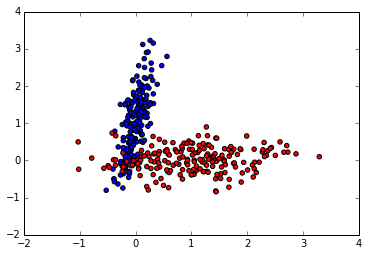

In [2]:
cov1 = [[0.1, 0.7], 
       [0, 0.1]]
cov2 = [[0.7, 0], 
       [0.1, 0.1]]

mean1 = [0. , 1.]
mean2 = [1. , 0.]

X1,y1 = np.random.multivariate_normal(mean1, cov1, 200).T
X2,y2 = np.random.multivariate_normal(mean2, cov2, 200).T

plt.scatter(X1, y1, c='blue')
plt.scatter(X2, y2, c='red')
plt.show()

In [3]:
from sklearn.lda import LDA

In [4]:
X = np.vstack((np.hstack((X1,X2)),np.hstack((y1,y2)))).T
y = np.ones(X.shape[0])
y[:X.shape[0]/2] *= -1

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X,y)

print 'weights:\n',lda.coef_
print 'b:\n',lda.intercept_

weights:
[[-1.29831382]
 [ 1.29831382]]
b:
[-1.53595657 -1.53595657]


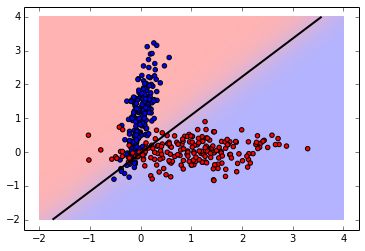

In [5]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'blue': [(0, 0.7, 0.7), (1, 1, 1)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'red': [(0, 1, 1), (1, 0.7, 0.7)]})
def plot_fisher(model):
    plt.cm.register_cmap(cmap=cmap)

    plt.scatter(X1, y1, c='blue')
    plt.scatter(X2, y2, c='red')

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    plt.scatter(X1, y1, c='blue')
    plt.scatter(X2, y2, c='red')

    plt.show()
plot_fisher(lda)

As seen in the previous plot, LDA on unequal covariance datasets.<br>
LDA can only learn linear boundries. quadratic lda is more flexible, see the next example

In [6]:
from sklearn.qda import QDA

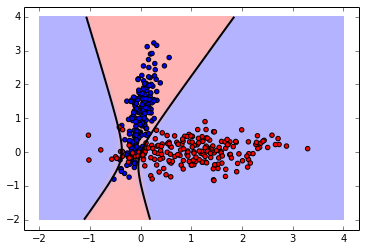

In [7]:
qda = QDA()
qda.fit(X,y)

plot_fisher(qda)

We have seen that LDA yields good results for equal covariances. As the example above showed, this may not hold true if the covariances differ. QDA was proposed as a model to induce more flexibility to LDA.

<img src="Auswahl_2015-11-27_003.png"/>

<img src="Auswahl_2015-11-27_004.png"/>

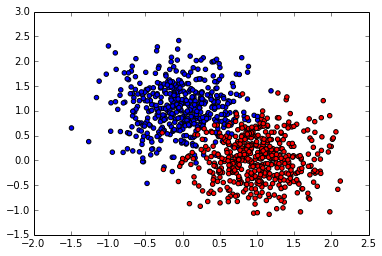

In [91]:
def gen_data(N, plot=False):
    cov = np.eye(2)*0.2

    mean1 = [0. , 1.]
    mean2 = [1. , 0.]

    X1,y1 = np.random.multivariate_normal(mean1, cov, N/2).T
    X2,y2 = np.random.multivariate_normal(mean2, cov, N/2).T
    
    if plot:
        plt.scatter(X1, y1, c='blue')
        plt.scatter(X2, y2, c='red')
        plt.show()

    X = np.hstack((np.vstack((X1,y1)),np.vstack((X2,y2)))).T
    y = np.ones(X.shape[0])
    y[:X.shape[0]/2] *= -1
    return X,y
dummy = gen_data(1000,True)

<img src="Auswahl_2015-11-27_005.png"/>

In [92]:
from numpy.linalg import lstsq

In [251]:
X,y = gen_data(1000)
A = np.vstack([X[:,0],np.ones(len(X[:,0]))]).T
w = lstsq(A,y)[0]

<img src="Auswahl_2015-11-27_006.png"/>

In [253]:
X_test, y_test = gen_data(1000)
pred = np.sign(w.dot(X_test.T)) == y_test

<img src="Auswahl_2015-11-27_007.png"/>

In [254]:
print pred.sum()/float(len(pred))

0.911


<img src="Auswahl_2015-11-27_008.png"/>

In [246]:
Ns = [2,4,6,8,10,20,40,100]
params = np.zeros((len(Ns),50,2))
perc_train = np.zeros((len(Ns), 50))
perc_test = np.zeros((len(Ns), 50))
for i, N in enumerate(Ns):
    for j in range(50):
        X, y = gen_data(N)
        A = np.vstack([X[:,0],np.ones(len(X[:,0]))]).T
        w = lstsq(A,y)[0]
        params[i,j] = w
        X_test, y_test = gen_data(1000)
        pred = np.sign(w.dot(X.T)) == y
        perc_train[i,j] = pred.sum()/float(len(pred))
        pred = np.sign(w.dot(X_test.T)) == y_test
        perc_test[i,j] = pred.sum()/float(len(pred))


<img src="Auswahl_2015-11-27_009.png"/>

In [247]:
print 'overall means, to see if everything makes sense'

means_per_N = params.mean(axis=1)
means_overall = means_per_N.mean(axis=0)
print 'w_1:',means_overall[0],'\tw_2:',means_overall[1]
print 'r_train:',perc_train.mean(),'\tr_test:',perc_test.mean()

overall means, to see if everything makes sense
w_1: 2.52103637734 	w_2: -1.71146222631
r_train: 0.914345833333 	r_test: 0.8917125


[ 1.11005987 -0.59373732]
0.903


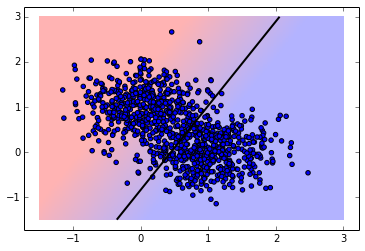

In [248]:
##############################
# first of all, plot the decision line to make sense of our numbers

X,y = gen_data(1000)
plt.scatter(X[:,0], X[:,1])
A = np.vstack([X[:,0], np.ones(len(X[:,0]))]).T
w = lstsq(A,y)[0]
print w
pred = np.sign(w.dot(X.T)) == y
print pred.sum()/float(len(pred))

xi = np.arange(-1,3)
plt.cm.register_cmap(cmap=cmap)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = w.dot(np.array([xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(-1,1))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')
plt.scatter(X[:,0], X[:,1])
plt.show()

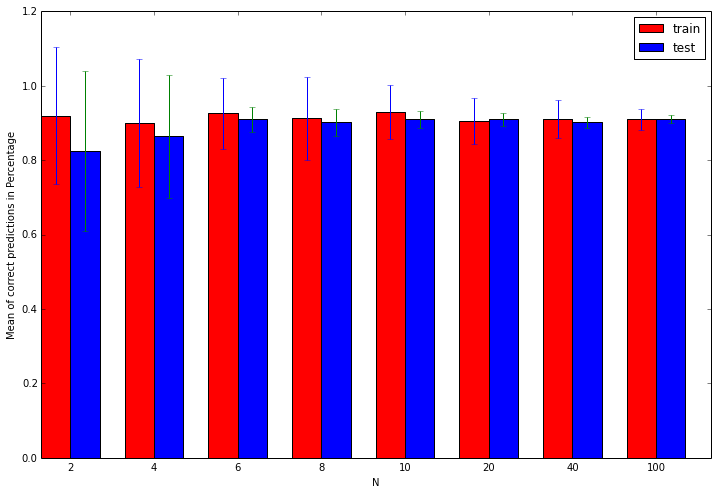

['N=2 test_error: 0.82492', 'N=4 test_error: 0.86422', 'N=6 test_error: 0.90942', 'N=8 test_error: 0.90226', 'N=10 test_error: 0.90946', 'N=20 test_error: 0.90984', 'N=40 test_error: 0.90254', 'N=100 test_error: 0.91104']


In [264]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ix = np.arange(len(Ns))
width = 0.35
bar1 = ax.bar(ix, perc_train.mean(axis=1), width, color='r', yerr=perc_train.std(axis=1))
bar2 = ax.bar(ix + width, perc_test.mean(axis=1), width, color='b', yerr=perc_test.std(axis=1))
ax.set_ylabel('Mean of correct predictions in Percentage')
ax.set_xlabel('N')
ax.set_xticks(ix + width)
ax.set_xticklabels([str(n) for n in Ns])
ax.legend((bar1[0], bar2[0]), ('train', 'test'))
plt.show()
print ['N='+str(Ns[i])+' test_error: '+str(e) for i,e in enumerate(perc_test.mean(axis=1))]

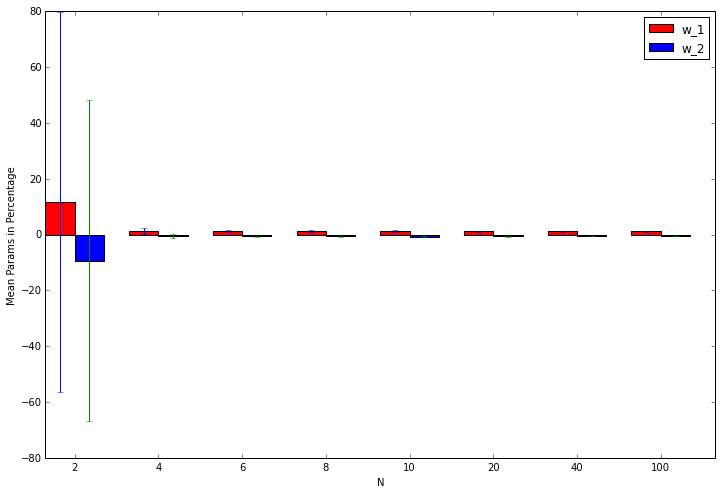

['N=2 test_error: [ 68.21595985  57.50726512]', 'N=4 test_error: [ 1.05359264  0.68230829]', 'N=6 test_error: [ 0.32608658  0.29637733]', 'N=8 test_error: [ 0.32945378  0.28022417]', 'N=10 test_error: [ 0.30203243  0.30837152]', 'N=20 test_error: [ 0.2124418   0.16049171]', 'N=40 test_error: [ 0.09863117  0.07746856]', 'N=100 test_error: [ 0.07025814  0.05475211]']


In [263]:
means_per_N = params.mean(axis=1)
stds_per_N = params.std(axis=1)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ix = np.arange(len(Ns))
width = 0.35
bar1 = ax.bar(ix, means_per_N[:,0], width, color='r', yerr=stds_per_N[:,0])
bar2 = ax.bar(ix + width, means_per_N[:,1], width, color='b', yerr=stds_per_N[:,1])
ax.set_ylabel('Mean Params in Percentage')
ax.set_xlabel('N')
ax.set_xticks(ix + width)
ax.set_xticklabels([str(n) for n in Ns])
ax.legend((bar1[0], bar2[0]), ('w_1', 'w_2'))
plt.show()
print ['N='+str(Ns[i])+' test_error: '+str(e) for i,e in enumerate(stds_per_N)]

<img src="Auswahl_2015-11-27_015.png"/>

test error minimizes for $max(N)$. Standard deviations also minimize for $max(N)$.<br>
If trained on a small dataset, the model naturally failes to generalize well. This is due to its high standart deviation. Since there are not enough points, the gradient and offset of the decision boundry are not very stable. As the datasize grows, the parameters are more and more stabalized: std. dev. and percentage error decrease.<br>
Because the data is not linearly seperable, a percentage error of around $10\,\%$, for high $N$, as we encountered seems to be quite good.

This behavior, to us, seems to be not of a surprise, since the $test$ set is distributed in exactly the same way as the $train$ set. Therefor, we have a good impression on the generalization of this specific, generated, problem. For a closer look on real data, having a much more complex, maybe shifting distribution, this results are not as helpful as they might seem to be.

<img src="Auswahl_2015-11-27_011.png"/>

<img src="Auswahl_2015-11-27_012.png"/>

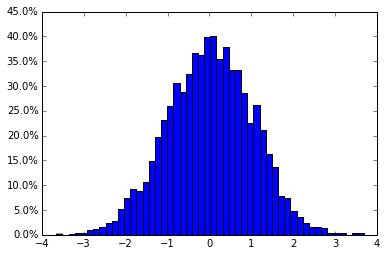

In [329]:
##################################
# first of all, implement a method to plot the distributions

import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

def plot_dist(x=np.random.randn(5000), bins=50, normed=True):
    # Make a normed histogram. It'll be multiplied by 100 later.
    plt.hist(x, bins, normed=normed)

    # Create the formatter using the function to_percent. This multiplies all the
    # default labels by 100, making them all percentages
    formatter = FuncFormatter(to_percent)

    # Set the formatter
    plt.gca().yaxis.set_major_formatter(formatter)

plot_dist()
plt.show()

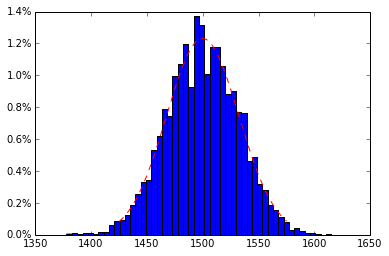

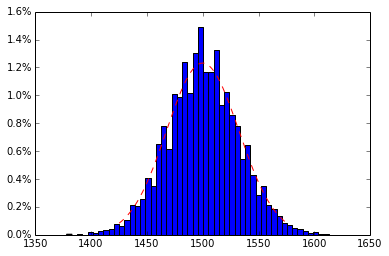

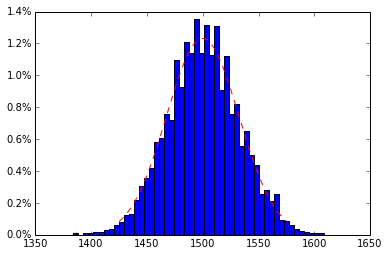

##################


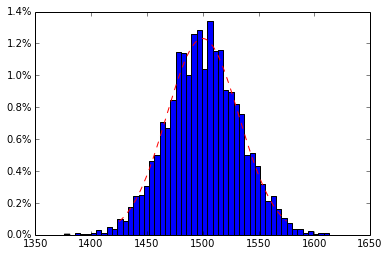

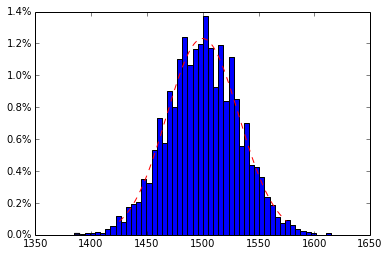

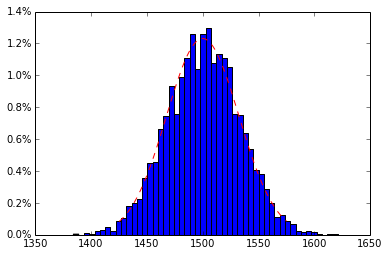

In [335]:
###################
# now for the binomial distribution

def test_binom(n,p):
    n, p = 5000, 0.3
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
    plot_dist([np.random.binomial(n,p) for _ in range(n)])
    plt.plot(x,binom.pmf(x,n,p),'r--')
    plt.show()

test_binom(5000,0.2)
test_binom(5000,0.5)
test_binom(5000,0.8)
print '##################'
test_binom(500,0.3)
test_binom(5000,0.3)
test_binom(500000,0.3)



<img src="Auswahl_2015-11-27_013.png"/>

<img src="Auswahl_2015-11-27_014.png"/>